<a href="https://colab.research.google.com/github/Gemma-B/Linear-Algebra-Portfolio/blob/main/Portfolio_Week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt

# Advanced Problem Week 7
## Question 1
Consider $A_r$ as discussed in Problem 6.

### (a) Produce a function which, given matrix $A$ and rank $r$, computes its low-rank approximation $A_r$.

This is a method that finds the $r$ rank approximation of $A$. That is, it finds the r-dimensional space that is closest to the given matrix. It does this by taking the first r singular values in $\Sigma$, and the corresponding r rows/columns of U and V to make sure their dimensions match. This results in a matrix that is the same size as the original matrix, but it has a lower rank.

In [ ]:
# A function that takes in a matrix 'A' and a integer 'r' and returns the 'r'-rank approximation of A
def lowRankApprox (A, r):
  U, Sigma, V = np.linalg.svd(A) # findings the SVD of A
  Sigma = np.diag(Sigma) # creating a diagonal matrix from the list of values given in the SVD decomposition
  lowSigma = Sigma[0:r, 0:r] # creating a new matrix that is only the first 'r' rows and columns of Sigma
  lowU = U[:, 0:r] # creating a new matrix that is only the first 'r' columns of U
  lowV = V[0:r, :] # creating a new matrix that is only the first 'r' rows of V
  lowA = lowU@lowSigma@lowV # multiplying them all together to create a matrix of the same dimension, but lower rank of A
  return lowA

### (b) Pick a $64 \times 64$ face from the Olivetti Faces dataset and treat it as a single $64\times 64$ matrix $A$. Comput its low-rank approximation $A_r$ for $1 \le r \le 64$, and visualize a spread of at least five of the resulting images.

This uses a face from the Olivetti Faces data set and treats it as a single 64 x 64 matrix, where each element represents a grayscale. We use our method from the previous part to compute its low-rank approximation with a rank from 1 to 64.

We print the first 10 faces (with rank 1-10) because the first singular values are very important. This means that a face with rank 1 is very different than a face with rank 2 or 3. You can see this with the faces we print out. However, after the first 10 faces, we then only print every 10 faces. We can see that they don't change too much, a face of rank 30 looks almost identical to a face of rank 60. This is because the other singular values are much less important and they don't affect the image as much when they are removed.

### (c) Plot the singular values $\sigma_i$ of $A$ for $1\le i \le n$.

Before we plot the faces, we first plot the singular values $\sigma$ of A. This graph shows a very steep drop in singular values after the first couple, and once they get past 15 or 20, the difference is almost insignificant. We can see this in the faces by seeing that they only become slightly less pixelate as we increase the rank past 15 or 20.

### (d) There are a lot of measures for the distance between two matrices, and a lot of them involve computing some norm of the difference of the two matrices. The command, np.linalg.matrix_norm(matrix, ord=ord) computes a lot of different types of matrix norms of different orders. Plot the norm of $(A - A_r)$ for $1 \le r \le 64$ and orders $\pm 2$ and $\pm \infty$. What do you notice?

The last three graphs are graphing the difference between $A$ and $A_r$ with an order of $\pm2$, and $\pm \infty$. 2 and -2 are on different graphs because they have significantly different values, but $\infty$ and $-\infty$ are on the same graph because they have similar values.


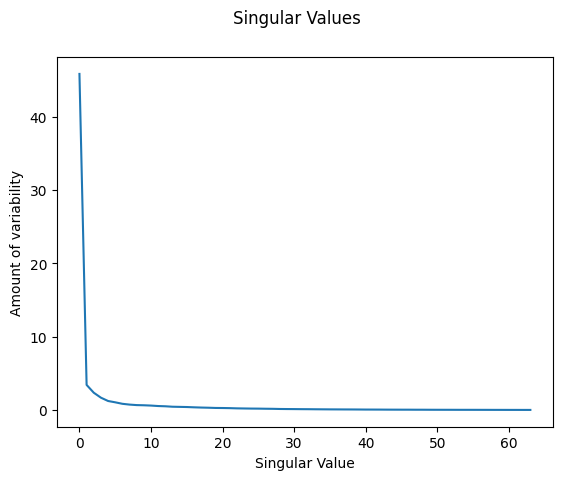

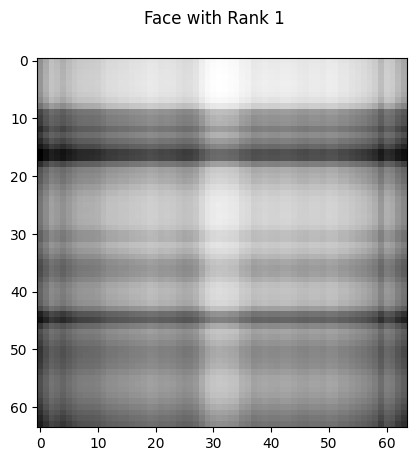

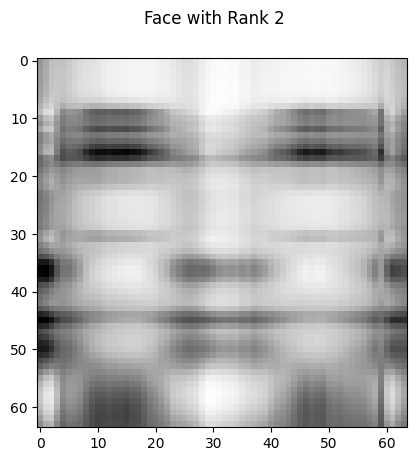

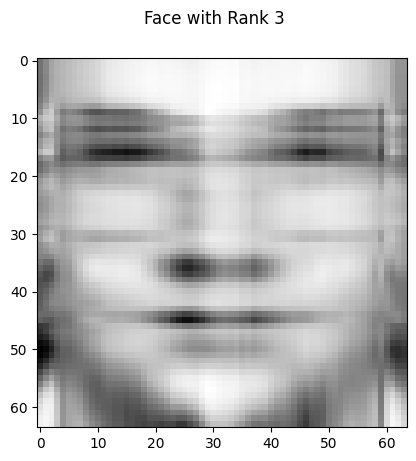

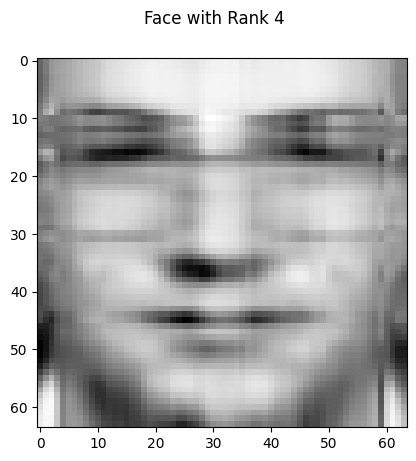

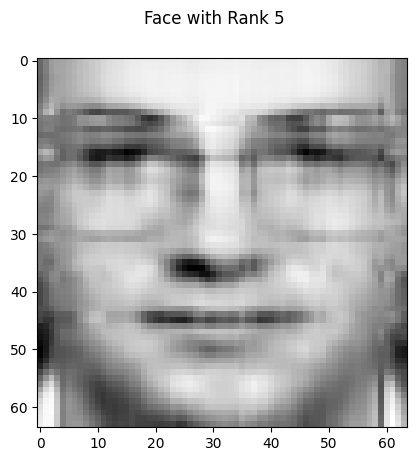

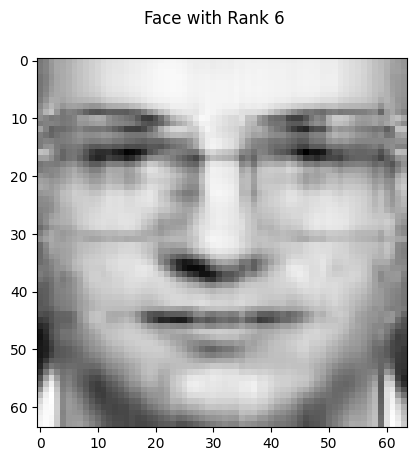

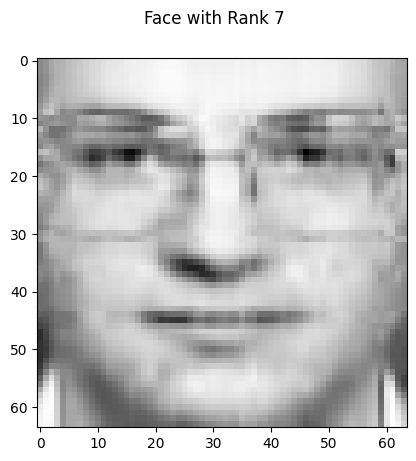

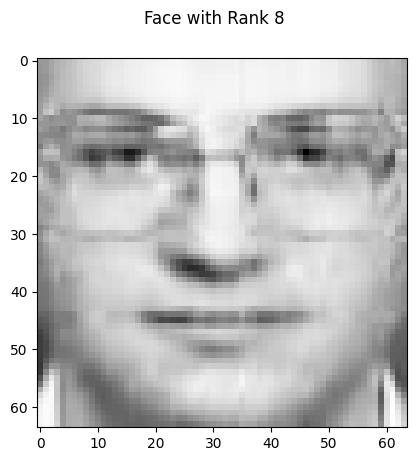

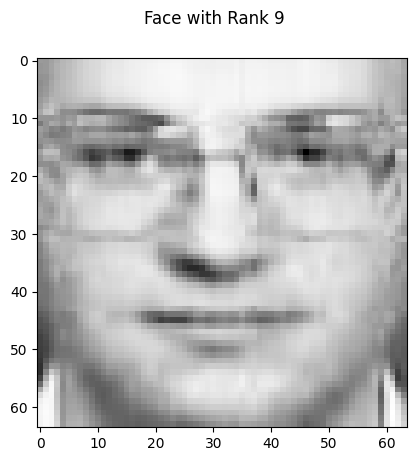

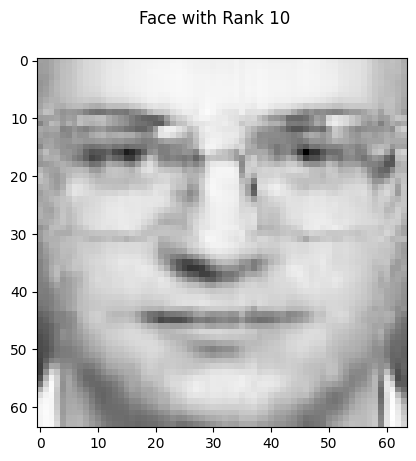

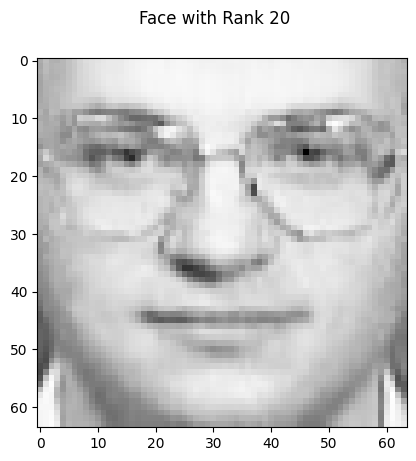

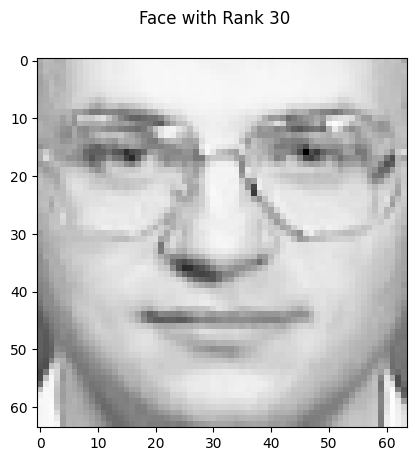

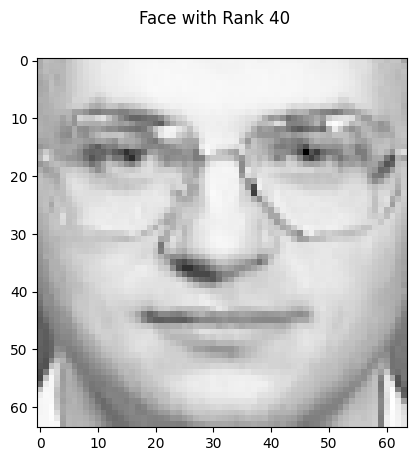

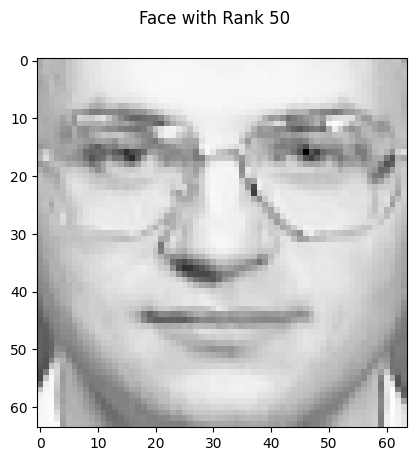

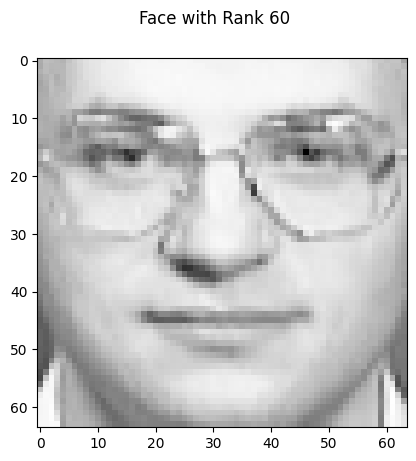

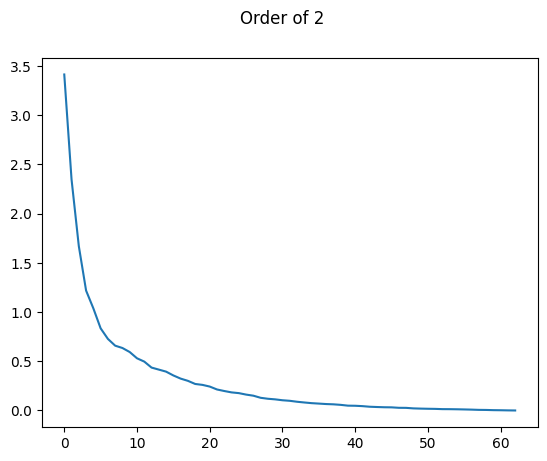

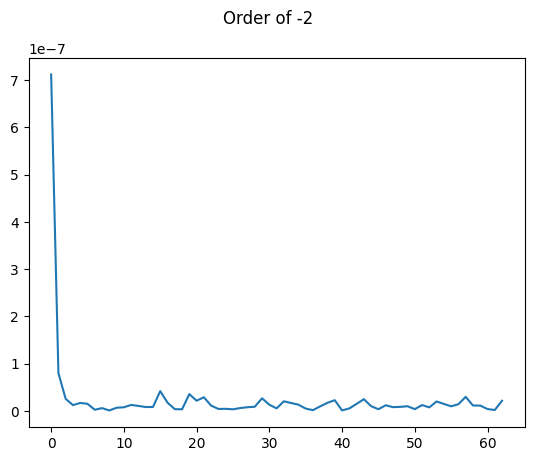

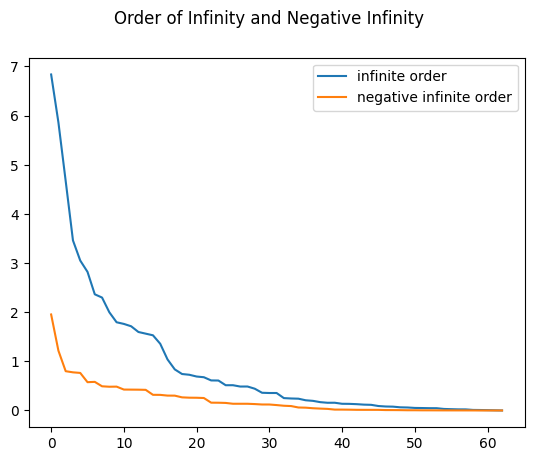

In [ ]:
images = sklearn.datasets.fetch_olivetti_faces() # importing face data set

all_face_pictures = images["data"]

one_face_picture = all_face_pictures[53] # choosing which face we want to use

matrix = one_face_picture.reshape((64,64)) # creating a matrix out of the pixels of the picture

U, Sigma, V = np.linalg.svd(matrix) # finding a SVD of our matrix

# creating a plot of our singular values from the singular values in Sigma
plt.plot(Sigma)
plt.suptitle("Singular Values")
plt.xlabel("Singular Value")
plt.ylabel("Amount of variability")

# Keeping track of orders
thingTwo = list()
thingInfinite = list()
thingNegativeTwo = list()
thingNegativeInfinite = list()

for i in range(1, 64):
  # Computing low rank approximations for rank of 1 to rank of 64
  lowMatrix = lowRankApprox(matrix, i)

  # keeping track of orders
  thingTwo.append(np.linalg.matrix_norm(matrix-lowMatrix, ord=2))
  thingInfinite.append(np.linalg.matrix_norm(matrix-lowMatrix, ord=np.inf))
  thingNegativeTwo.append(np.linalg.matrix_norm(matrix-lowMatrix, ord=-2))
  thingNegativeInfinite.append(np.linalg.matrix_norm(matrix-lowMatrix, ord=-np.inf))

  # printing out the first 8 low rank approximations
  if i in range (1,11):
    plt.show()
    plt.suptitle("Face with Rank " + str(i))
    plt.imshow(lowMatrix, cmap="Grays_r")
  # then printing out every 10 low rank approximation after that
  elif i%10==0:
    plt.show()
    plt.suptitle("Face with Rank " + str(i))
    plt.imshow(lowMatrix, cmap="Grays_r")

# plotting the orders of 2, -2 , infinity, and negative infinity
plt.show()
plt.suptitle("Order of 2")
plt.plot(thingTwo)
plt.show()

plt.suptitle("Order of -2")
plt.plot(thingNegativeTwo)
plt.show()

plt.suptitle("Order of Infinity and Negative Infinity")
plt.plot(thingInfinite, label='infinite order')
plt.plot(thingNegativeInfinite, label='negative infinite order')
plt.legend()